## Linear Regression이란?

#### <span style="color:red">딥러닝의 딥은 통계의 결과들이 무수히 얽혀있는 즉 연산들이 복잡하다는 뜻의 Deep이다.</span>
<span style="color:red">이 연산중에서 가장 기본이 되는 연산이 바로 Linear Regression 선형회귀다.</span>
여기서는 과연 선형회귀가 어떤 것인지 차근차근 살펴보겠다

학생들과 성적의 관계
학생들마다 다 다양한 성적 분포를 가지는데...여기에 어떤 연관이 있는지 알아내고
그 연관 관계를 이용해서 결국에는 특정학생의 성적을 예측해보자.
학생들의 기말고사 성적은 [      ]에 따라 다르다

[     ]안에 시험성적을 좌우할 만한 요소들로 무엇이 있을까?
여기서 [     ]안에 들어갈 내용을 '정보'라 한다. 머신러닝과 딥러닝은 이 정보가 필요하다. 
정보를 정확히 준비해 놓기만 하면 성적을 예측하는 방정식을 만들수 있다.

이것을 수학적으로 정의하면, 성적을 변하게 하는 '정보' 요소를 X라 하고, 이 값에 따라 변하는 '성적'을 Y라 한다. 'X값이 변함에 따라 Y값도 변한다'는 정의 안에서 독립적으로 변할수 있는 값 X를 독립변수라 한다.
또한, 이 독립 변수에 따라 종속적으로 변하는 Y를 종속변수라 한다.
<span style="color:red">선형회귀는 독립변수 X를 이용해서 종속변수 Y를 예측하고 설명하는 작업을 말한다.</span>

### 예측선 그리기

기말고사를 준비하는 학생들을 대상으로 자료를 조사한 결과를 바탕으로 공부한 시간을 통해서 시험성적을 예측하자. <br/>
     X = [2,  4,  6,  8] <br/> 
     Y = [81, 93, 91, 97]

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

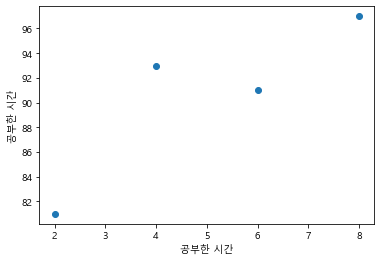

In [5]:
X = [2,  4,  6,  8]
Y = [81, 93, 91, 97]

plt.scatter(X, Y)
plt.xlabel('공부한 시간')
plt.ylabel('공부한 시간')
plt.show()

왼쪽이 아래로 향하고 오른쪽이 위를 향하는 선형(직선으로 표시되는 형태의 그래프)을 보인다. 선형회귀는 이 점들의 특징을 가장 잘 나타내는 선을 그리는 과정이다.  여기서 선은 곧 일차함수 그래프이며 다음과 같은 공식으로 표현된다.<br>
      <span style="color:red">y = ax + b</span>
      <br>
여기서 x값은 독립변수이고 y값은 종속변수이다. 즉, x 값에 따라서 y값은 반드시 달라진다. 다만, 정확하게 계산하려면 상수 a와 b의 값을 알아야한다.<br>

따라서 선형회귀문제는 결과적으로 a와 b값을 알아내는 문제이다.

### 최소제곱법
    일차함수의 기울기 a와 절편 b를 구할수 있다
    
    a = (x-x평균)(y-y평균)의 합 / (x-x평균)**의 합
    b = y의 평균-(x의 평균x기울기a)
    
    a = 2.3    b = 79

### <span style="color:red"><center>y = 2.3x + 79</center></span>

In [10]:
'''
위의 최소제곱법 공식을 가지고
기울기 a와 y의 절편 b를 구해보자.
X의 모든 원소의 값 평균을 구하는 함수는 mean()을 사용하겠다.
'''

mx = np.mean(X)
my = np.mean(Y)

#(x-x평균)**의 합
divisor = sum([(i-mx)**2 for i in X])

#분자
def top(X, mx, Y, my) :
    d = 0
    for i in range(len(X)) :
        d+=(X[i]-mx) * (Y[i]-my)
    return d

dividend = top(X, mx, Y, my)

a = dividend / divisor

print(a)

b = my-(mx * a)
print(b)

2.3
79.0


In [12]:
### 우리는 위에서 얻은 a, b 값을 사용해서 H(x)를 구할 수 있다.
X = np.array(X)
Y = np.array(Y)
predict = a*X + b
print(predict)

[83.6 88.2 92.8 97.4]


### 원래 X, Y값을 가장 잘 예측하는 선형을 그려보자
#### 위에서 최소제곱근의 결과로 나온 a,b를 활용한 H(x)=wX+b 선형그래프이다.

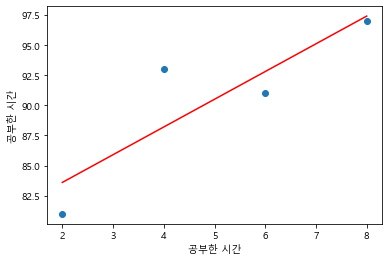

In [13]:
plt.scatter(X, Y)
plt.plot(X, predict, c = 'r')
plt.xlabel('공부한 시간')
plt.ylabel('공부한 시간')
plt.show()

### 평균제곱 오차 
<span style="color:red">
   $$
   \frac{1}{n}\sum(pred_i - y_i)^2
   $$
</span>

#### 평균제곱 오차가 작다는 것은 실제값과 예측값 사이의 간극이 크지 않다는 것을 말한다.
    앞으로 딥러닝과 머신러닝을 공부할때 굉장히 많이 나오는 공식으로 이 값이 작으면 작을수록 예측한값의
    정확도가 높아짐을 의미한다.
#### 선형회귀란 임의의 직선을 그어서 이에 대한 평균제곱 오차를 구하고 이 값을 가장 작게 만들어주는  a와 b값을 찾아가는 작업이다.


In [14]:
#공식을 함수화
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

In [15]:
mse(predict, Y) #0에 가까울 수록 오차가 없다..Gradient Descent(경사하강법)을 이용해서 경사를 줄여나가야한다.

8.299999999999985

In [18]:
'''
위의 결과로 얼마만큼의 오차가 발생하였는지를 수치적으로 정량화 시켜보았다.
다음으로는 발생한 오차를 줄여서 
loss function의 값이 0에 가까워지도록 학습해야 한다.
이 방법은 내부적으로 미분(편미분)이 사용된다.
미분을 사용해서 오차를 줄여나가는 학습 방법을 경사하강법 Gradient Descent라고 한다.
'''

'\n위의 결과로 얼마만큼의 오차가 발생하였는지를 수치적으로 정량화 시켜보았다.\n다음으로는 발생한 오차를 줄여서 \nloss function의 값이 0에 가까워지도록 학습해야 한다.\n이 방법은 내부적으로 미분(편미분)이 사용된다.\n미분을 사용해서 오차를 줄여나가는 학습 방법을 경사하강법 Gradient Descent라고 한다.\n'